In [10]:
import numpy as np     #Âè™ÈúÄË¶Å‰∏ãËΩΩnumpyÂ∫ìÂç≥ÂèØ
import random
import GridWorld_v3
from draw import draw  #ÁªòÂõæÂáΩÊï∞
from ExperienceReplayBuffer import ExperienceReplayBuffer
import tqdm

In [11]:
rows = 5      #ËÆ∞ÂæóË°åÊï∞ÂíåÂàóÊï∞ËøôÈáåË¶ÅÂêåÊ≠•Êîπ
columns = 5
gridworld = GridWorld_v3.GridWorld_v3(forbiddenAreaScore=-10, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()
trajectorySteps = 1000

‚¨úÔ∏è‚¨úÔ∏è‚¨úÔ∏è‚¨úÔ∏è‚¨úÔ∏è
‚¨úÔ∏èüö´üö´‚¨úÔ∏è‚¨úÔ∏è
‚¨úÔ∏è‚¨úÔ∏èüö´‚¨úÔ∏è‚¨úÔ∏è
‚¨úÔ∏èüö´‚úÖüö´‚¨úÔ∏è
‚¨úÔ∏èüö´‚¨úÔ∏è‚¨úÔ∏è‚¨úÔ∏è


In [12]:
policy = 0.2 * np.ones((rows*columns,5))
episodes = [gridworld.getTrajectoryScore(nowState = 10,action = random.randint(0,4),policy = policy) 
            for i in range(500)]

# Áõ∏ÂØπ‰∫é‰πãÂâçÊòØÂ¢ûÂä†‰∫ÜExperienceReplayBuffer


In [13]:
experiencePool = ExperienceReplayBuffer(max_size=10000)
policy = 0.2 * np.ones((rows*columns,5))
episodes = [gridworld.getTrajectoryScore(nowState = 10,action = random.randint(0,4),policy = policy) 
            for i in range(500)]
for trajectory in episodes:
    for exp in trajectory:#‰∏Ä‰∏™expÂ∞±‰ª£Ë°®states,action,reward,next_state,next_action,terminal
        experiencePool.add_expericence(exp)

In [14]:
experiencePool.getSize()

10000

In [15]:
state_values = np.array([random.random() for i in range(25)])
learning_rate = 0.01
gamma = 0.99
batch_size = 500

  0%|          | 0/1000 [00:00<?, ?it/s]

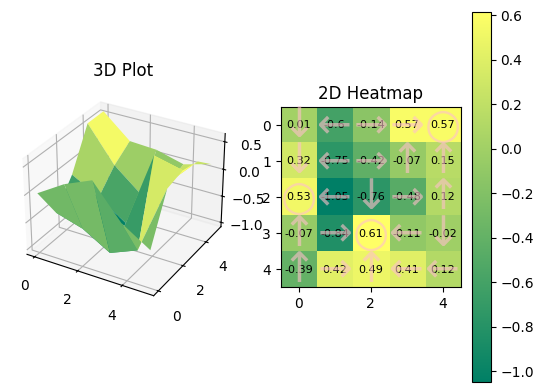

  0%|          | 1/1000 [00:00<02:50,  5.85it/s]

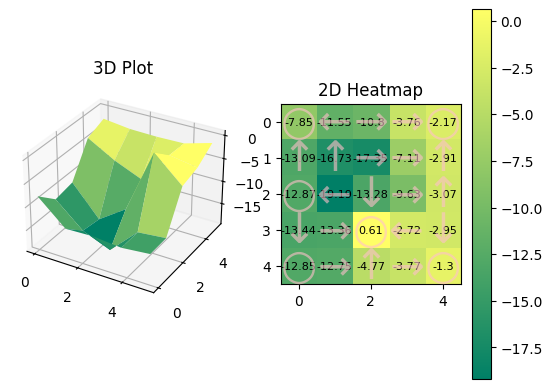

  2%|‚ñè         | 21/1000 [00:00<00:13, 71.58it/s]

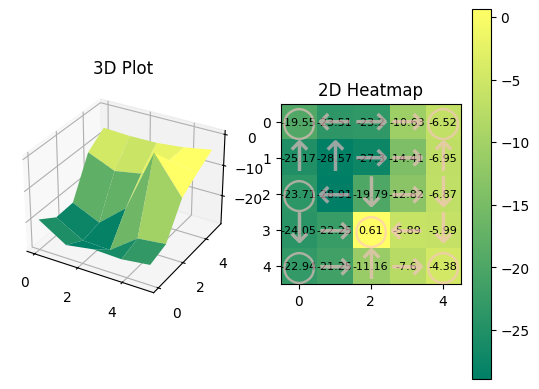

  4%|‚ñç         | 41/1000 [00:00<00:10, 95.63it/s]

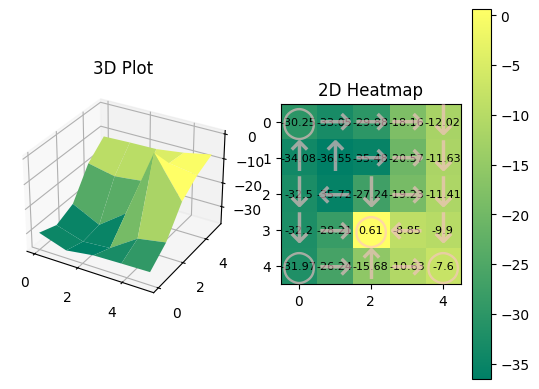

  6%|‚ñå         | 61/1000 [00:00<00:08, 105.10it/s]

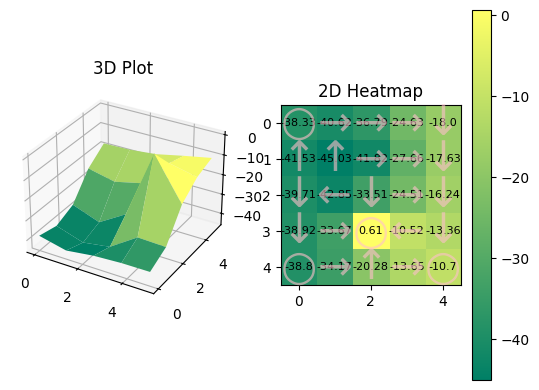

  8%|‚ñä         | 81/1000 [00:00<00:08, 110.20it/s]

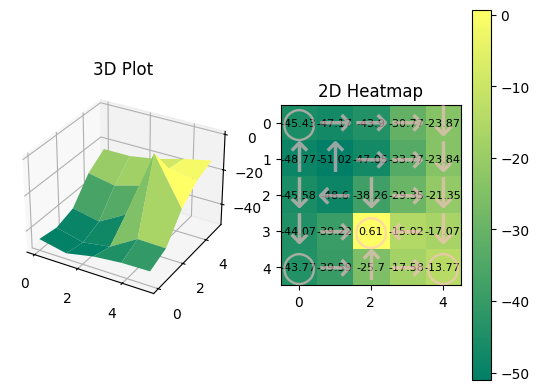

 10%|‚ñà         | 101/1000 [00:00<00:07, 115.29it/s]

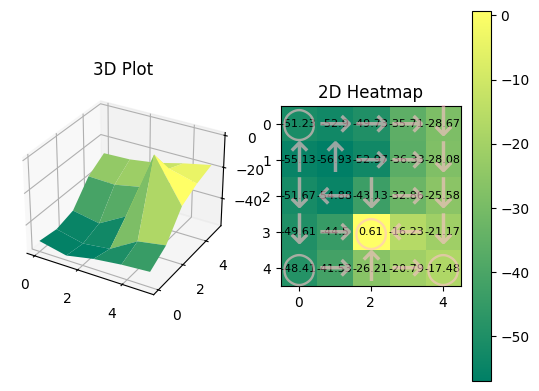

 12%|‚ñà‚ñè        | 121/1000 [00:01<00:08, 102.20it/s]

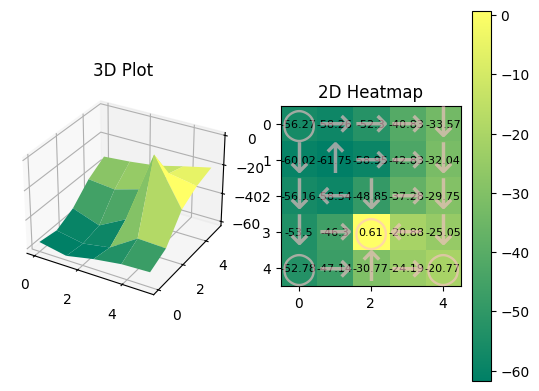

 14%|‚ñà‚ñç        | 141/1000 [00:01<00:08, 106.82it/s]

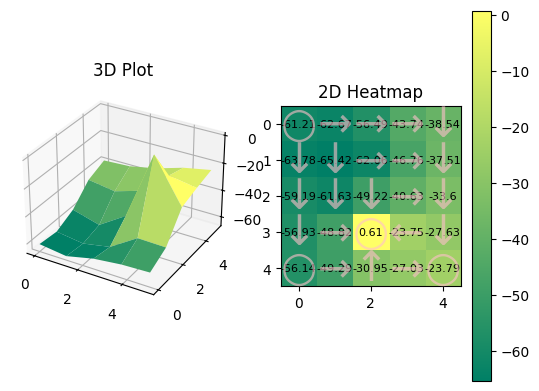

 16%|‚ñà‚ñå        | 161/1000 [00:01<00:08, 103.42it/s]

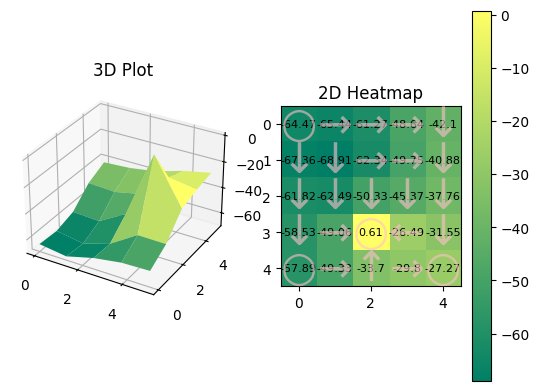

 18%|‚ñà‚ñä        | 181/1000 [00:01<00:07, 108.00it/s]

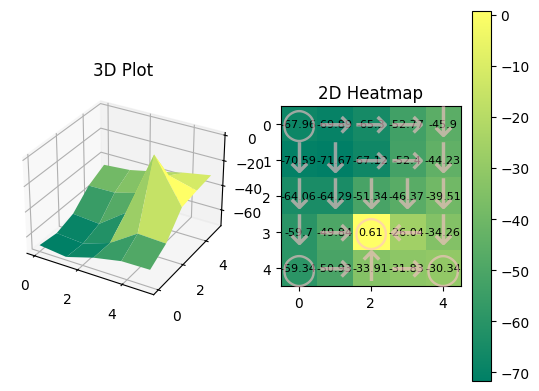

 20%|‚ñà‚ñà        | 201/1000 [00:01<00:07, 111.64it/s]

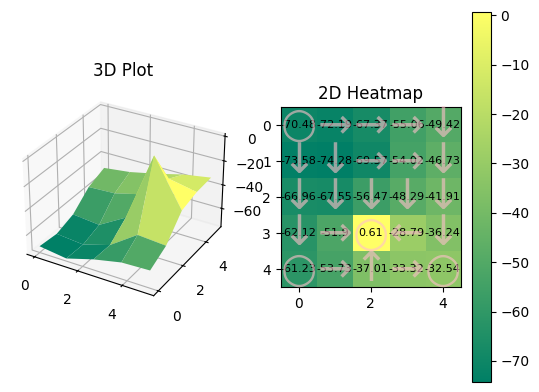

 22%|‚ñà‚ñà‚ñè       | 221/1000 [00:02<00:06, 113.09it/s]

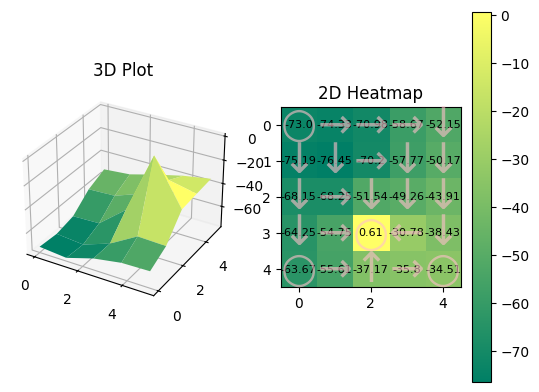

 24%|‚ñà‚ñà‚ñç       | 241/1000 [00:02<00:07, 97.78it/s] 

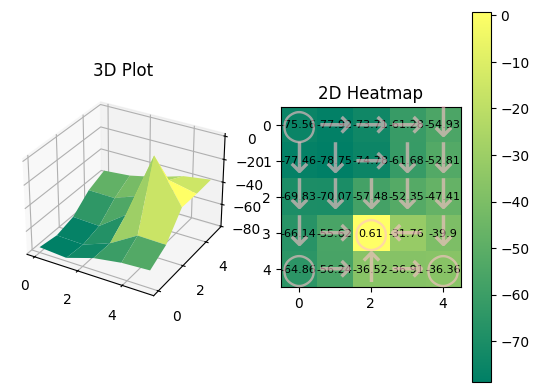

 26%|‚ñà‚ñà‚ñå       | 261/1000 [00:02<00:07, 101.73it/s]

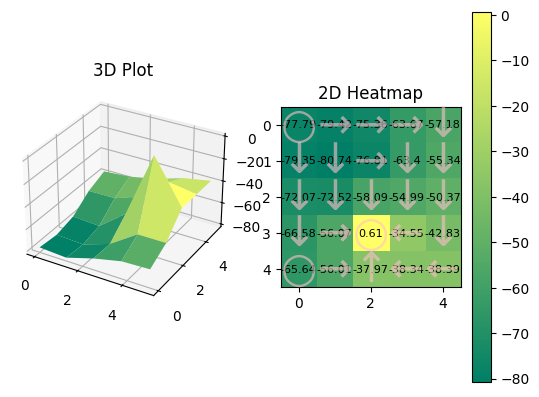

 28%|‚ñà‚ñà‚ñä       | 281/1000 [00:02<00:06, 104.79it/s]

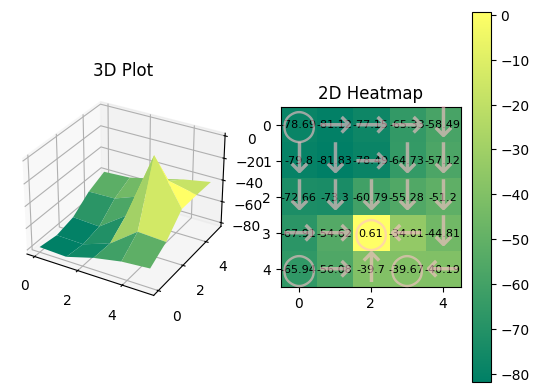

 30%|‚ñà‚ñà‚ñà       | 301/1000 [00:02<00:06, 108.32it/s]

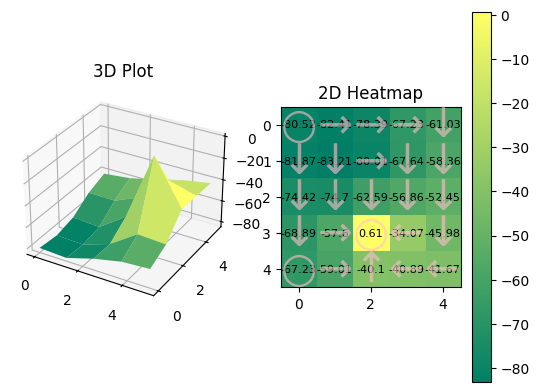

 32%|‚ñà‚ñà‚ñà‚ñè      | 321/1000 [00:03<00:06, 110.45it/s]

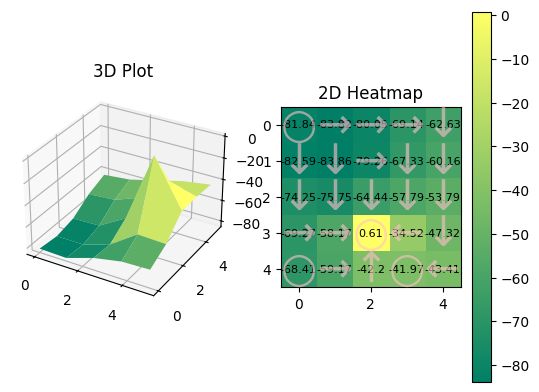

 34%|‚ñà‚ñà‚ñà‚ñç      | 341/1000 [00:03<00:06, 109.15it/s]

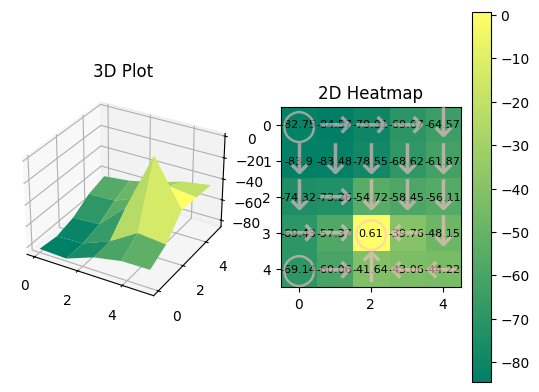

 36%|‚ñà‚ñà‚ñà‚ñå      | 361/1000 [00:03<00:05, 110.76it/s]

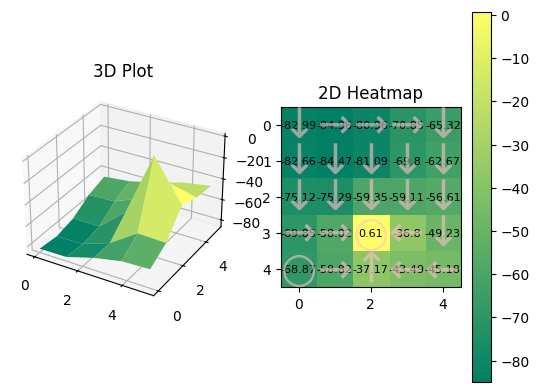

 38%|‚ñà‚ñà‚ñà‚ñä      | 381/1000 [00:03<00:06, 94.99it/s] 

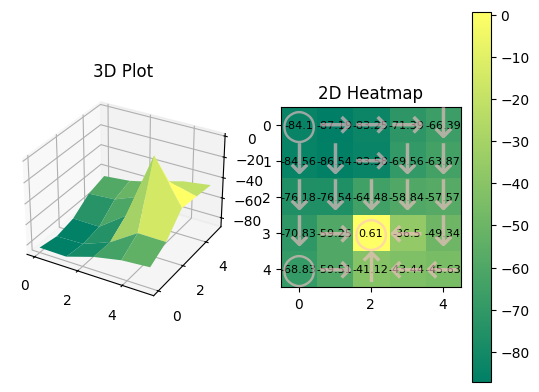

 40%|‚ñà‚ñà‚ñà‚ñà      | 401/1000 [00:03<00:06, 99.76it/s]

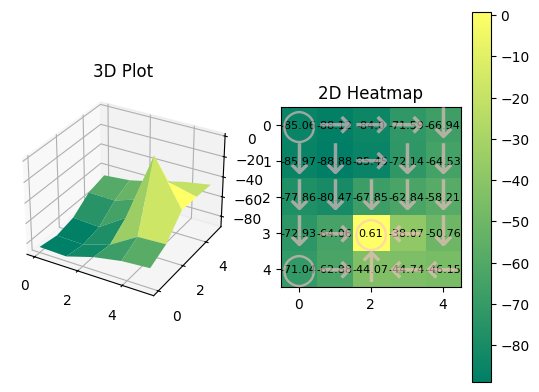

 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 421/1000 [00:04<00:05, 103.50it/s]

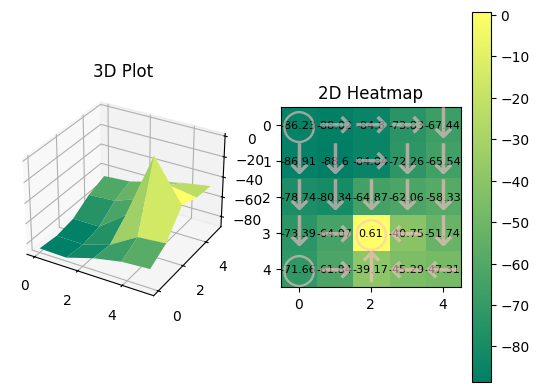

 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 441/1000 [00:04<00:05, 102.39it/s]

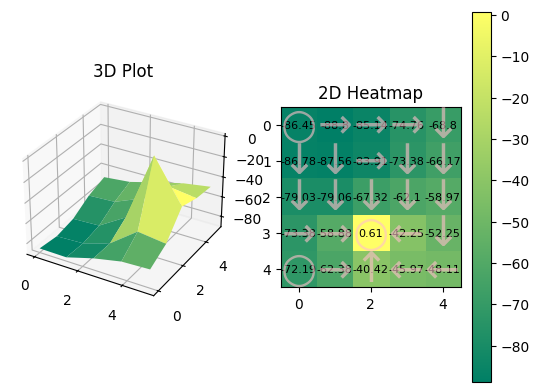

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 461/1000 [00:04<00:05, 106.07it/s]

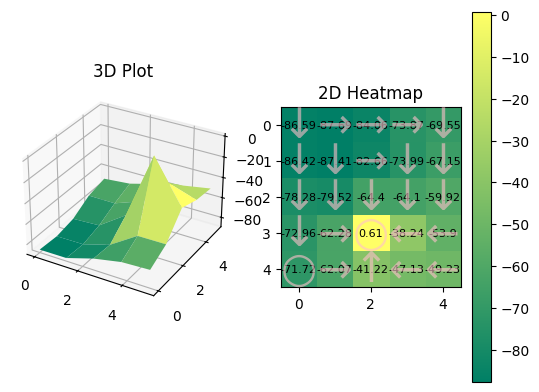

 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 481/1000 [00:04<00:04, 109.45it/s]

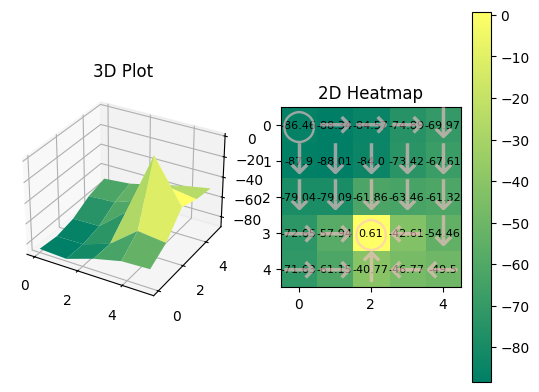

 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 501/1000 [00:04<00:05, 98.27it/s] 

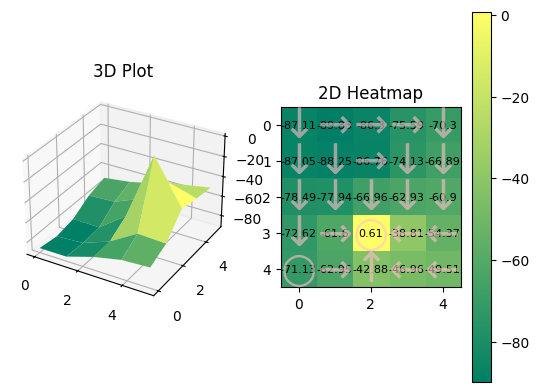

 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 521/1000 [00:05<00:04, 104.46it/s]

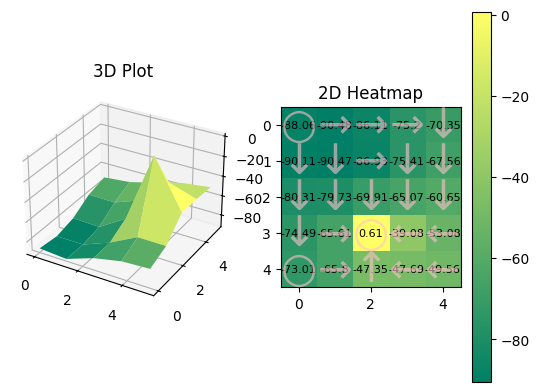

 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 541/1000 [00:05<00:04, 104.79it/s]

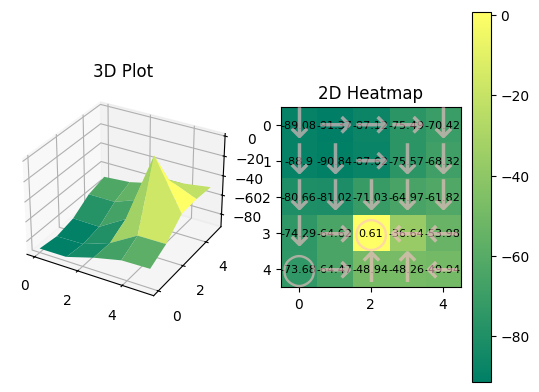

 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 561/1000 [00:05<00:04, 108.32it/s]

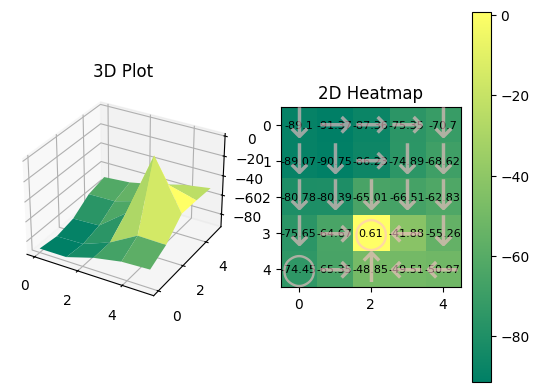

 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 581/1000 [00:05<00:03, 111.63it/s]

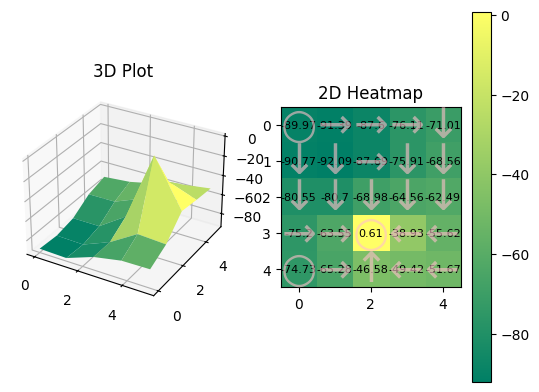

 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 601/1000 [00:05<00:03, 114.83it/s]

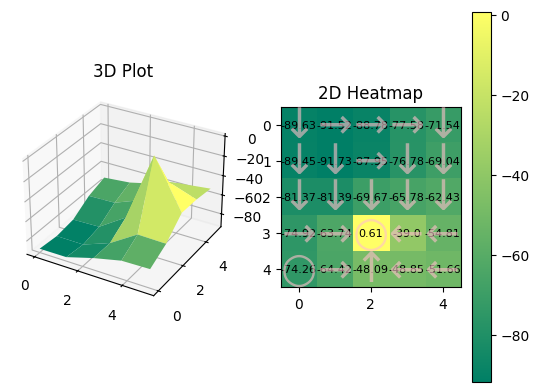

 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 621/1000 [00:05<00:03, 112.40it/s]

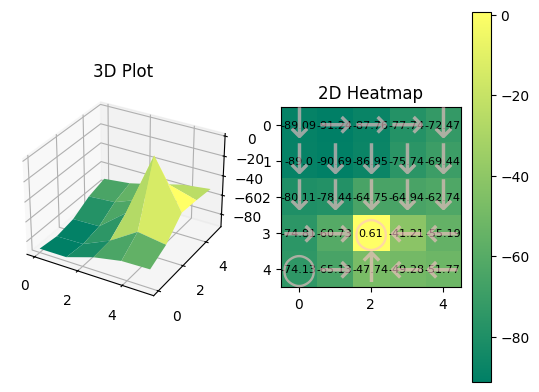

 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 641/1000 [00:06<00:03, 100.26it/s]

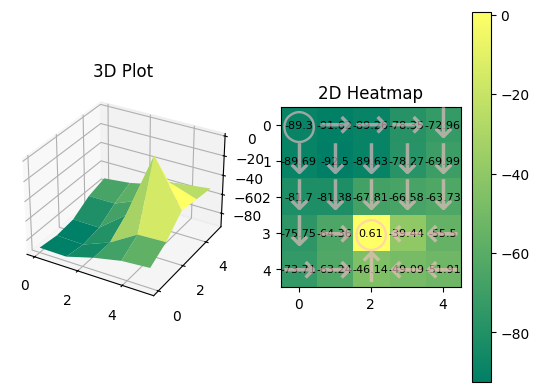

 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 661/1000 [00:06<00:03, 105.66it/s]

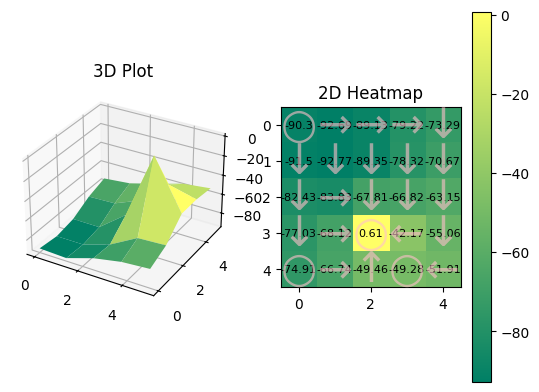

 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 681/1000 [00:06<00:02, 109.95it/s]

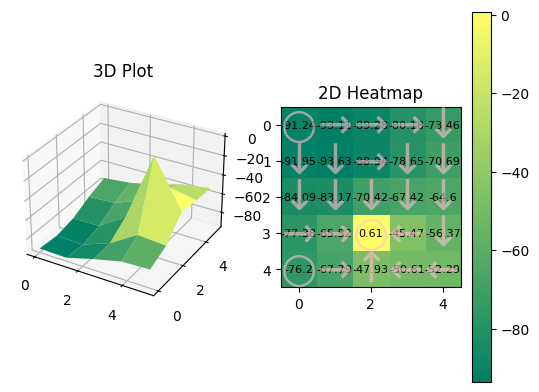

 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 701/1000 [00:06<00:02, 109.07it/s]

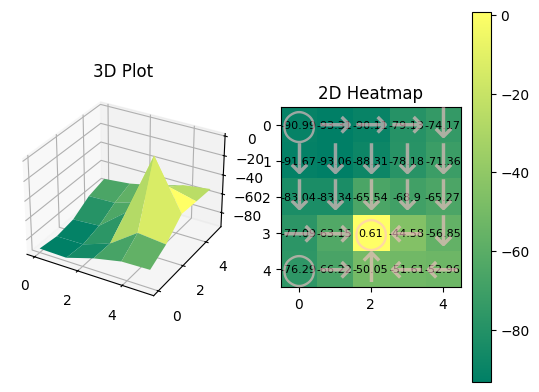

 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 721/1000 [00:06<00:02, 112.34it/s]

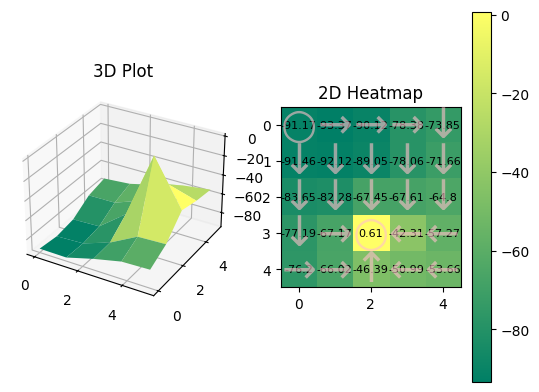

 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 741/1000 [00:07<00:02, 114.26it/s]

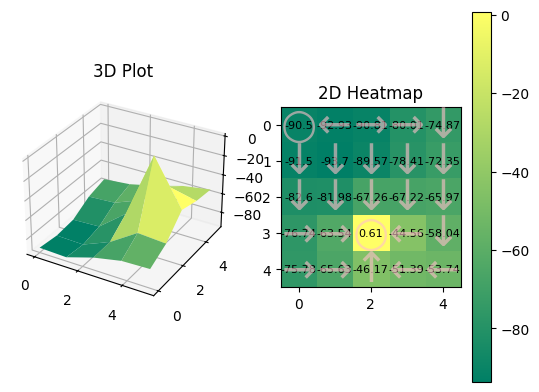

 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 761/1000 [00:07<00:02, 116.25it/s]

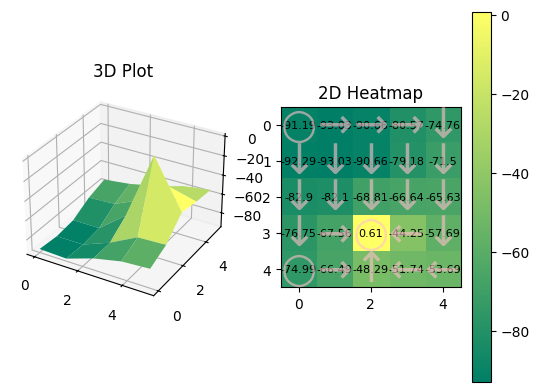

 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 781/1000 [00:07<00:02, 96.45it/s] 

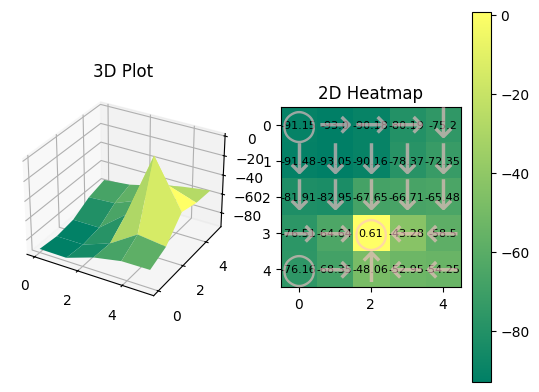

 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 801/1000 [00:07<00:01, 103.41it/s]

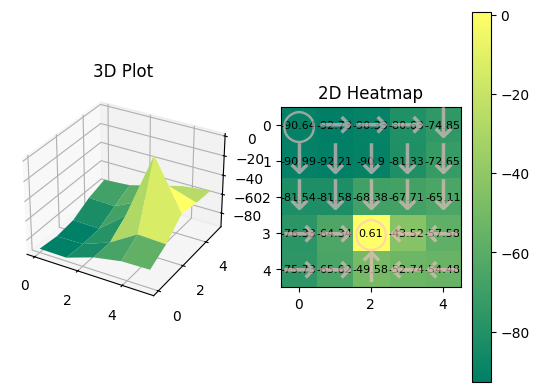

 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 821/1000 [00:07<00:01, 103.41it/s]

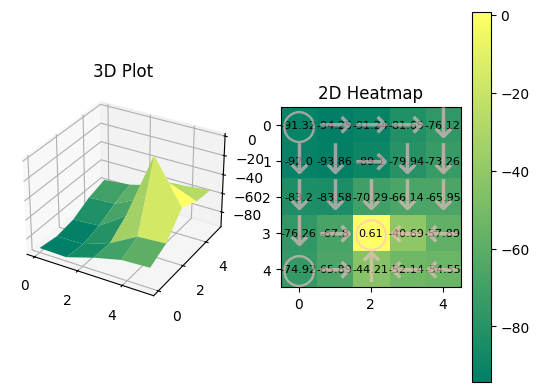

 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 841/1000 [00:07<00:01, 108.26it/s]

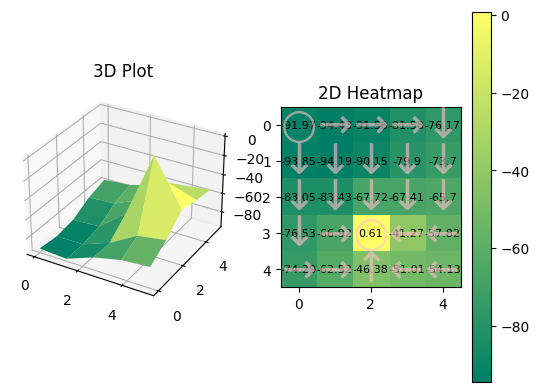

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 861/1000 [00:08<00:01, 111.75it/s]

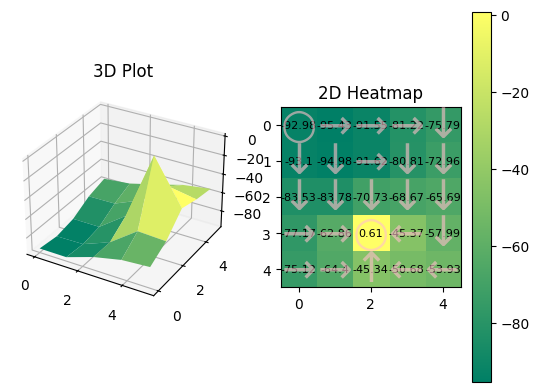

 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 881/1000 [00:08<00:01, 113.47it/s]

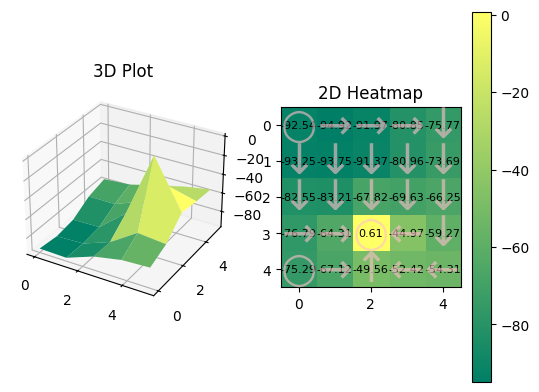

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 901/1000 [00:08<00:00, 110.17it/s]

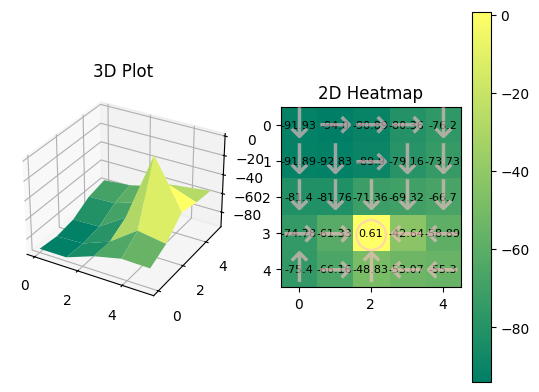

 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 921/1000 [00:08<00:00, 98.72it/s] 

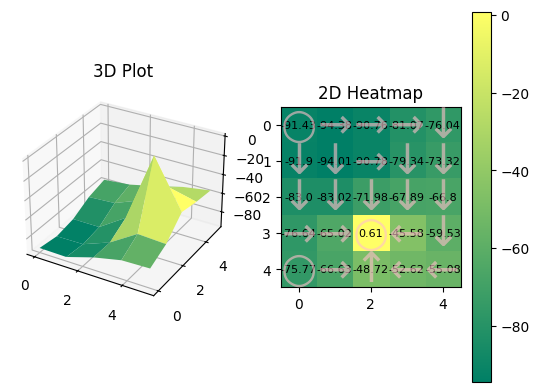

 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 941/1000 [00:08<00:00, 104.47it/s]

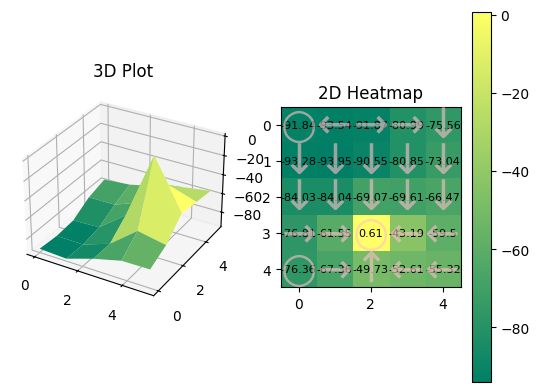

 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 961/1000 [00:09<00:00, 105.17it/s]

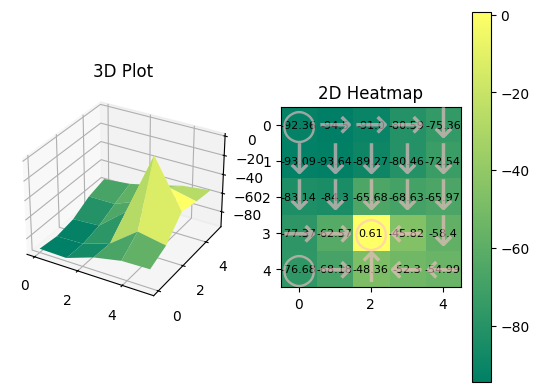

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:09<00:00, 107.59it/s]


In [16]:
# ÈÅçÂéÜ1000Ê¨°Ôºå‰ΩøÁî®tqdmÂ∫ìÊòæÁ§∫ËøõÂ∫¶Êù°
for _ in tqdm.tqdm(range(1000)):
    # ‰ªéÁªèÈ™åÊ±†experiencePool‰∏≠ÈááÊ†∑‰∏ÄÊâπÁªèÈ™åÊï∞ÊçÆÔºåÊâπÊ¨°Â§ßÂ∞è‰∏∫batch_size
    exps = experiencePool.sample_exps(batch_size=batch_size)
    # ÈÅçÂéÜÈááÊ†∑ÂæóÂà∞ÁöÑÊØè‰∏ÄÊù°ÁªèÈ™åËΩ®Ëøπ
    for trajectory in exps:
        # Ëß£ÂåÖÁªèÈ™åËΩ®ËøπÔºåËé∑ÂèñÂΩìÂâçÁä∂ÊÄÅ„ÄÅÂä®‰Ωú„ÄÅÂæóÂàÜ„ÄÅ‰∏ã‰∏Ä‰∏™Áä∂ÊÄÅ„ÄÅ‰∏ã‰∏Ä‰∏™Âä®‰ΩúÂíåÁªàÊ≠¢Ê†áÂøó
        tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = trajectory
        # Ëé∑Âèñ‰∏ã‰∏Ä‰∏™Áä∂ÊÄÅÁöÑÂÄº
        next_state_value = state_values[nextState]
        # Ê†πÊçÆË¥ùÂ∞îÊõºÊñπÁ®ãËÆ°ÁÆóÁõÆÊ†áÂÄº
        target = tmpscore + (1.0 - terminal) * gamma * next_state_value

        # ËÆ°ÁÆóÊó∂Èó¥Â∑ÆÂàÜÔºàTDÔºâËØØÂ∑Æ
        TD_error = state_values[tmpstate] - target
        # Ê†πÊçÆTDËØØÂ∑ÆÊõ¥Êñ∞ÂΩìÂâçÁä∂ÊÄÅÁöÑÂÄº
        state_values[tmpstate] -= learning_rate * TD_error
    # ÊØè20Ê¨°Ëø≠‰ª£ÊâßË°å‰∏ÄÊ¨°‰ª•‰∏ãÊìç‰Ωú
    if _ % 20 == 0:
        # ÈöèÊú∫ÂàùÂßãÂåñÂä®‰ΩúÂÄºÂáΩÊï∞ÔºåÂΩ¢Áä∂‰∏∫(25, 5)
        action_values = np.random.rand(25,5)
        # ÈÅçÂéÜÊâÄÊúâÁä∂ÊÄÅÂíåÂä®‰Ωú
        for i in range(25):
            for j in range(5):
                # ‰ªéÁΩëÊ†º‰∏ñÁïåÁéØÂ¢Égridworld‰∏≠Ëé∑ÂèñÊâßË°åÂä®‰Ωú(i, j)ÁöÑÂæóÂàÜÂíå‰∏ã‰∏Ä‰∏™Áä∂ÊÄÅ
                score, nextState = gridworld.getScore(i,j)
                # Ê†πÊçÆË¥ùÂ∞îÊõºÊñπÁ®ãÊõ¥Êñ∞Âä®‰ΩúÂÄºÂáΩÊï∞
                action_values[i][j] = score + gamma * state_values[nextState]
        
        # ÊâæÂá∫ÊØè‰∏™Áä∂ÊÄÅ‰∏ãÁöÑÊúÄ‰ºòÂä®‰Ωú
        p = np.argmax(action_values,axis=1)
        # ÁªòÂà∂Áä∂ÊÄÅÂÄºÂáΩÊï∞ÂíåÊúÄ‰ºòÂä®‰ΩúÁ≠ñÁï•
        draw(state_values.reshape(5,5), p)

In [17]:
import random
data = [1, 2, 3, 4, 5]
# ÊäΩÂèñ3‰∏™ÂÖÉÁ¥†ÔºàÂÖÅËÆ∏ÈáçÂ§çÔºâ
result = random.choices(data, k=3)  # ÂèØËÉΩËæìÂá∫Ôºö[2, 2, 5]
result

[4, 5, 5]

In [18]:
result = random.sample(data, k=3)  # ‰øùËØÅÁªìÊûúÊó†ÈáçÂ§ç
result

[3, 5, 1]